# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segamentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [2]:
# Q1 (code)
!pip install tomotopy
!pip install little-mallet-wrapper
!pip install tweet-preprocessor


In [1]:
import tomotopy as tp
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path
import pandas as pd


C:\Users\70794\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [2]:
# Q2 (code)
# Load the datasets
sanders_tweets_df = pd.read_csv('sanders_tweets.csv')
trump_tweets_df = pd.read_csv('trump_tweets.csv')

# Concatenate the datasets
combined_df = pd.concat([sanders_tweets_df, trump_tweets_df])

# Display the combined dataset
print(combined_df.head())


     Username              TweetId                           Title  \
0  SenSanders  1351670845639421952  SenSanders_1351670845639421952   
1  SenSanders  1351259762722279424  SenSanders_1351259762722279424   
2  SenSanders  1351242822293319680  SenSanders_1351242822293319680   
3  SenSanders  1350885541911400448  SenSanders_1350885541911400448   
4  SenSanders  1349880150041780224  SenSanders_1349880150041780224   

                                             Content  
0  Wealth increase in past 10 months:\n⬆️$173 bil...  
1  Amidst massive income and wealth inequality te...  
2  “We now have the resources, we now have the sk...  
3  After surviving an attempt on his life, Russia...  
4  President-Elect Biden's COVID rescue plan will...  


### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


Prepare cleaning.

In [3]:
import re
import nltk
from nltk.corpus import stopwords

# Create lists for the data.
training_data = []
original_texts = []
titles = []


 Start cleaning up.

In [4]:

# define a function to clean data
def preprocess_text(text, title):
    # Remove everything I don't need
    processed_text = little_mallet_wrapper.process_string(text, numbers='remove', 
                                                          lowercase=True, 
                                                          remove_stop_words = True, 
                                                          remove_punctuation= True)
    # Remove URLS and user mentions
    processed_text = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump", 
                            '', 
                            processed_text, 
                            flags=re.MULTILINE) # Tip: add the following line to remove URLS and user mentions
    # add the cleaning data into the lists
    training_data.append(processed_text)
    original_texts.append(text)
    titles.append(title)
    

Applying the preprocess function to the data frame.

In [5]:
# Applying the preprocess function to the data frame, we take the content for cleaning and title for identification
combined_df.apply(lambda x: preprocess_text(x['Content'], 
                                            x['Title']), 
                  axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
23070    None
23071    None
23072    None
23073    None
23074    None
Length: 30371, dtype: object

In [6]:
# check the output
training_data[0]

'wealth increase past months billion elon musk billion jeff bezos billion walton family billion bill gates billion mark zuckerberg year increase minimum wage must tax rich raise minimum wage least'

## LDA topic modelling

### Q4. Train a an LDA topic model with `tomotopy`

In [8]:
# Q4 (code)
# Number of topics to return
num_topics = 15
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')


Topic Model Training...


Iteration: 0	Log-likelihood: -9.724927277237374
Iteration: 10	Log-likelihood: -9.33633150498515
Iteration: 20	Log-likelihood: -9.167123691455418
Iteration: 30	Log-likelihood: -9.065420094131651
Iteration: 40	Log-likelihood: -8.990832278001879
Iteration: 50	Log-likelihood: -8.939343907772278
Iteration: 60	Log-likelihood: -8.903151250188929
Iteration: 70	Log-likelihood: -8.871251927384806
Iteration: 80	Log-likelihood: -8.847274003432236
Iteration: 90	Log-likelihood: -8.82739887071067


### Q5. Print out the top words for each topic and manually evaluate their coherence


In [9]:
# Q5a (code)
# Print out top 10 words for each topic
print("\nTopic Model Results:\n\n")

# Create lists to save the topics and words
topics = []
topic_individual_words = []

for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


Topic Model Results:


✨Topic 0✨

american drug americans must america workers every today prices million

✨Topic 1✨

health care people must change right climate country energy system

✨Topic 2✨

war people support law today first president must iran trump

✨Topic 3✨

great thank today president whitehouse honor day america women happy

✨Topic 4✨

president north korea live news today whitehouse trump house white

✨Topic 5✨

tax trump people working social security republicans must class cuts

✨Topic 6✨

vote great election big republican win party state get thank

✨Topic 7✨

great total endorsement job military strong complete thank amendment vets

✨Topic 8✨

states united people country world must many would one america

✨Topic 9✨

democrats border impeachment senate house want court wall president dems

✨Topic 10✨

news fake media never people even like would bad said

✨Topic 11✨

great jobs china years trade country big economy many much

✨Topic 12✨

trump biden president joe fox

# Q5b (words)
# Describe what each topic is about. What ideas, values, or situations do these keywords refer to?

<font color=blue>✨Topic 0: american drug americans must america workers every today prices million
    
<font color=blue>This topic focuses on American socioeconomic issues, emphasizing the challenges and costs associated with pharmaceutical pricing and its impact on workers. The recurrent mention of "millions" and "Americans" suggests large-scale implications or statistics related to these topics within the U.S. context.
    
    -----------------------

<font color=blue>✨Topic 1: health care people must change right climate country energy system
    
<font color=blue>Keywords such as "health," "care," "climate," and "energy" indicate a focus on public health and environmental issues. This topic likely addresses the urgent need for policy change in healthcare systems and climate response, reflecting ongoing societal and political discussions.
    
    -----------------------

<font color=blue>✨Topic 2: war people support law today first president must iran trump
    
<font color=blue>This topic centers around U.S. foreign policy, particularly relating to war, law, and leadership, with references to specific figures and countries like "Iran" and "Trump." The inclusion of terms like "support" and "president" suggests a discussion of political endorsements and strategies.
    
    -----------------------

<font color=blue>✨Topic 3: great thank today president whitehouse honor day america women happy
    
<font color=blue>This topic seems to cover ceremonial or celebratory events involving the presidency, such as visits or honors given at the White House. Keywords like "thank," "honor," and "happy" imply a positive tone, celebrating achievements or special days.
    
    -----------------------

<font color=blue>✨Topic 4: president north korea live news today whitehouse trump house white
    
<font color=blue>Focusing on the interactions between the U.S. and North Korea, this topic likely discusses political developments and news related to these nations. The presence of "live," "news," and "Whitehouse" suggests coverage of real-time events or announcements from the presidency.
    
    -----------------------

<font color=blue>✨Topic 5: tax trump people working social security republicans must class cuts
    
<font color=blue>This topic deals with tax legislation and social security, highlighting debates around "tax cuts" and the "working class." The opposition by "Republicans" suggests partisan debates regarding fiscal policies impacting the American populace.
    
    -----------------------

<font color=blue>✨Topic 6: vote great election big republican win party state get thank
    
<font color=blue>Emphasizing electoral activities, this topic includes terms like "vote," "election," "win," and "Republican," pointing to discussions on political campaigns, party strategies, and election results, likely in a U.S. context.
    
    -----------------------

<font color=blue>✨Topic 7: great total endorsement job military strong complete thank amendment vets
    
<font color=blue>With a strong focus on military and national strength, this topic discusses endorsements, job performance, and military appreciation, indicated by words like "military," "strong," and "vets." It reflects a patriotic tone, emphasizing national defense and veteran affairs.
    
    -----------------------

<font color=blue>✨Topic 8: states united people country world must many would one america
    
<font color=blue>This topic explores the U.S.'s position within global affairs and its internal unity, using phrases like "united states," "country," and "world." It likely discusses America's role on the world stage and its internal cohesion.
    
    -----------------------

<font color=blue>✨Topic 9: democrats border impeachment senate house want court wall president dems
    
<font color=blue>Dealing with domestic political strife and border issues, this topic focuses on "Democrats," "impeachment," and "border," reflecting tensions around national security and political opposition, with particular emphasis on the controversy over border wall funding.
    
    -----------------------

<font color=blue>✨Topic 10: news fake media never people even like would bad said
    
<font color=blue>This topic addresses criticism of the media, often described as "fake news," and discusses public perception and media bias. It includes commentary on the trustworthiness of media outlets and the impact of media on public opinion.
    
    -----------------------

<font color=blue>✨Topic 11: great jobs china years trade country big economy many much
    
<font color=blue>Focusing on economic issues and trade, particularly with China, this topic discusses "jobs," "trade," and "economy," reflecting on the economic strategies and their outcomes on national and international scales.
    
    -----------------------

<font color=blue>✨Topic 12: trump biden president joe foxnews sleepy via donald tonight bernie
    
<font color=blue>Centered on prominent political figures like "Trump," "Biden," and media channels like "Foxnews," this topic discusses political narratives, media portrayals, and personal dynamics within the political sphere.
    
    -----------------------

<font color=blue>✨Topic 13: workers pay wage billion year million street people wall americans
    
<font color=blue>This topic highlights labor issues and economic disparities, discussing "workers," "wage," and "billion," indicating debates on wage laws, worker rights, and economic policies aimed at reducing inequality.
    
    -----------------------

<font color=blue>✨Topic 14: trump fbi russia president collusion witch hunt mueller campaign hillary
    
<font color=blue>This topic delves into controversies and investigations involving "Trump," "FBI," "Russia," and "Mueller," discussing legal and political scrutiny concerning allegations of collusion and the subsequent legal and public reactions.</font>

## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

In [9]:
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5756572848558427 
Per Topic: [0.6647915780544281, 0.6310342103242874, 0.5380408927798271, 0.5009823098778725, 0.6726468622684478, 0.5701166182756424, 0.6812710076570511, 0.5017802476882934, 0.5380858272314072, 0.5036756277084351, 0.49066354632377623, 0.5516303211450577, 0.5949768513441086, 0.7602389305830002, 0.434924441576004]



As preparation for X1, I perform several repetitions of the exercise to change the topic numbers

In [12]:
# Number of topics to return
num_topics = 10
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for tweet in training_data:
    model.add_doc(tweet.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

Topic Model Training...


Iteration: 0	Log-likelihood: -9.589030624043758
Iteration: 10	Log-likelihood: -9.229661146017545
Iteration: 20	Log-likelihood: -9.07628521719285
Iteration: 30	Log-likelihood: -8.99584518513471
Iteration: 40	Log-likelihood: -8.945843679041722
Iteration: 50	Log-likelihood: -8.913166527895736
Iteration: 60	Log-likelihood: -8.887566054520757
Iteration: 70	Log-likelihood: -8.858212160383525
Iteration: 80	Log-likelihood: -8.842151802783897
Iteration: 90	Log-likelihood: -8.825854260035346


In [13]:
coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5442460363171995 
Per Topic: [0.4361029103398323, 0.4479350298643112, 0.5067444115877151, 0.4870298355817795, 0.615483814291656, 0.591238261014223, 0.6399715214967727, 0.5652056634426117, 0.5272126019001007, 0.6255363136529922]



### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained

# Q6 (words)
<font color=blue>Initially, I trained the model with 15 topics. Then I changed it to 10. The results are as follows:
| Number of Topics | Coherence Score |
| :--- | :--- |
| 10 | 0.5442460363171995 |
| 15 | 0.5756572848558427 |


<font color=blue>Initially I chose to use 15 topics to calculate the coherence score, and the score was 0.58. Then I reduced the number of topics to 10, and the average coherence became 0.54. The coherence of the last topic is obviously smaller than the others. It is about Political Investigations and Allegations and contains keywords such as "Trump," "FBI," "Russia," and "Mueller," most of which are names of people. and organization name, it may be that such words cannot provide more detailed and effective information. In contrast, the first topic contains words such as "health," "care," "climate," and "energy" that can explain the meaning of the topic.
    
<font color=blue>After I changed the number of topics to 10, it is obvious that more topics can bring better results, and judging from the value of each topic, there are more topics less than 0.5 than when there are 15 topics. Further training and observation may therefore be required.

### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

In [19]:
def plot_coherence_scores(training_data):
    # the number of topics I would like to plot
    topic_amounts = [5, 10, 15, 20, 25, 30]
    coherences = []

    for num_topics in topic_amounts:
        model = tp.LDAModel(k=num_topics)
        
        # add the doc to the model
        for tweet in training_data:
            model.add_doc(tweet.strip().split())
        
        # training...
        iterations = 10
        for i in range(0, 100, iterations):
            model.train(iterations)
        
        # calculate the score
        coh = tp.coherence.Coherence(model, coherence='c_v')
        average_coherence = coh.get_score()
        coherences.append(average_coherence)
        
        # print the score of every topic numbers
        print('\n==== Coherence : c_v ====')
        print('Average:', average_coherence, 'for Number of Topics:', num_topics)
    
    # plot
    plt.figure(figsize=(10, 5))
    plt.plot(topic_amounts, coherences, marker='o')
    plt.title('LDA Model Coherence by Number of Topics')
    plt.xlabel('Number of Topics')
    plt.ylabel('Average Coherence Score')
    plt.xticks(topic_amounts)  # all of the test numbers
    plt.grid(True)
    plt.show()


==== Coherence : c_v ====
Average: 0.5064772452414036 for Number of Topics: 5

==== Coherence : c_v ====
Average: 0.5576964558660984 for Number of Topics: 10

==== Coherence : c_v ====
Average: 0.5843590777615707 for Number of Topics: 15

==== Coherence : c_v ====
Average: 0.5900074519589542 for Number of Topics: 20

==== Coherence : c_v ====
Average: 0.5941079613864422 for Number of Topics: 25

==== Coherence : c_v ====
Average: 0.6110666773219903 for Number of Topics: 30


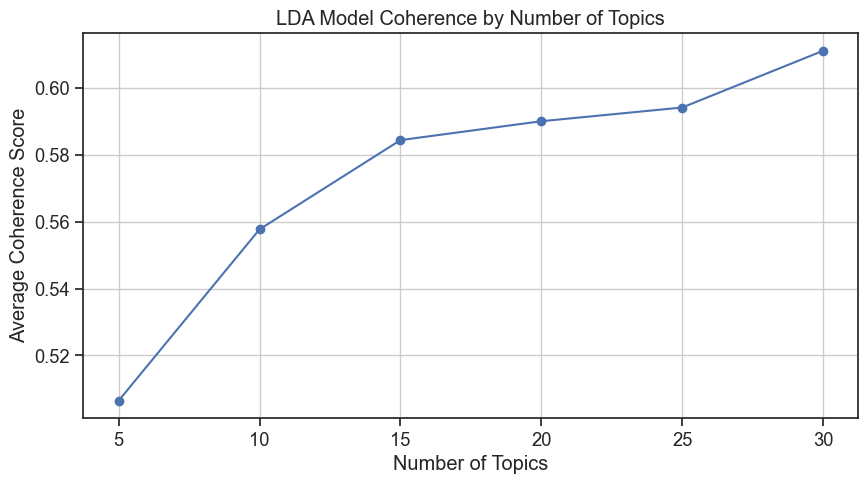

In [20]:
plot_coherence_scores(training_data)

### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [17]:
# Q7a (code)
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]
topic_distributions[32]

[0.0026931379,
 0.0028021082,
 0.045365233,
 0.004425697,
 0.004114431,
 0.00258183,
 0.0020597042,
 0.0022214085,
 0.0030549208,
 0.21110746,
 0.5847882,
 0.0016120644,
 0.004455457,
 0.0038400877,
 0.0038573085,
 0.003685583,
 0.003941618,
 0.0049796985,
 0.0024107094,
 0.003448114,
 0.046125658,
 0.0036487465,
 0.0036387162,
 0.0033120601,
 0.04583001]

In [18]:
from IPython.display import Markdown, display
import re

def make_md(string):
    display(Markdown(str(string)))

# Define a function to calculate the most related topics
def get_top_docs(docs, topic_distributions, topic_index, n=5):

    sorted_data = sorted([(_distribution[topic_index], _document)
                          for _distribution, _document
                          in zip(topic_distributions, docs)], reverse=True)

    topic_words = topics[topic_index]

    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n")
    print("---")

    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)

        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')

    return

Choose a topic that seems to represent Trump.

In [20]:
# Display 6 documents for topic 10
get_top_docs(topics, topic_distributions, topic_index=10, n=6)

### ✨Topic 10✨

news fake media never people even like would bad said



---


✨  
**Topic Probability**: 0.5186296105384827  
**Document**: great total endorsement job military strong complete thank amendment vets



✨  
**Topic Probability**: 0.36841294169425964  
**Document**: president north korea live **news** today whitehouse trump house white



✨  
**Topic Probability**: 0.14037242531776428  
**Document**: great jobs china years trade country big economy many much



✨  
**Topic Probability**: 0.12947997450828552  
**Document**: war **people** support law today first president must iran trump



✨  
**Topic Probability**: 0.04149169102311134  
**Document**: great thank today president whitehouse honor day america women happy



✨  
**Topic Probability**: 0.03373157978057861  
**Document**: american drug americans must america workers every today prices million



Choose a topic that seems to represent Sanders.

In [45]:
# Display 6 documents for topic 13
get_top_docs(topics, topic_distributions, topic_index=13, n=6)

### ✨Topic 13✨

workers pay wage billion year million street people wall americans



---


✨  
**Topic Probability**: 0.037566863000392914  
**Document**: tax trump **people** working social security republicans must class cuts



✨  
**Topic Probability**: 0.037566863000392914  
**Document**: great jobs china years trade country big economy many much



✨  
**Topic Probability**: 0.009173151105642319  
**Document**: democrats border impeachment senate house want court **wall** president dems



✨  
**Topic Probability**: 0.00765451043844223  
**Document**: **workers** **pay** **wage** **billion** **year** **million** **street** **people** **wall** **americans**



✨  
**Topic Probability**: 0.005750490818172693  
**Document**: war **people** support law today first president must iran trump



✨  
**Topic Probability**: 0.005413825623691082  
**Document**: states united **people** country world must many would one america



Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

# Q7b (words)
<font color=blue>The results above indicate that the model has successfully identified distinct topics within the tweets of both politicians.

<font color=blue>For instance, Topic 10, which refers to criticisms of the media and includes terms like 'fake news', 'media', and 'bad', seems to predominantly represent Trump's views. This is likely because Trump frequently criticizes the media and uses the term 'fake news' to discredit negative news about him. This topic's top document also contains the term 'news', further suggesting it's more representative of Trump's views.

<font color=blue>On the other hand, Topic 13, which includes terms related to economic disparities and worker's rights such as 'workers', 'pay', 'wage', 'billion', and 'year', seems to be more representative of Sanders' views. Sanders is known for his focus on social justice and economic equality, and these topics are central to his political discourse. Interestingly, the top document for this topic contains all the key terms from the topic, further suggesting it's more aligned with Sanders' views.

<font color=blue>Overall, these topics likely represent the key themes and concerns of each politician's political discourse and can provide valuable insights into their priorities and perspectives.

## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [21]:
# Create a sample of tweets

from random import sample

target_labels = sample(titles,100)

In [55]:
# Q8 (code)
# Create a heatmap using the random sample
# Tip: to display more than 20 tweets you have to change the values of `dim =` in sns.heatmap()
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks', font_scale=1.2)

# Define a function to generate the heatmap
def plot_categories_by_topics_heatmap(labels,
                                      topic_distributions,
                                      topic_keys,
                                      output_path=None,
                                      target_labels=None,
                                      color_map = sns.cm.rocket_r,
                                      dim=None):

    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution[:len(topic_keys)]):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Tweet': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Tweet',
                                     columns='Topic',
                                     values='Probability')
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()

    # Show the final plot.
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()

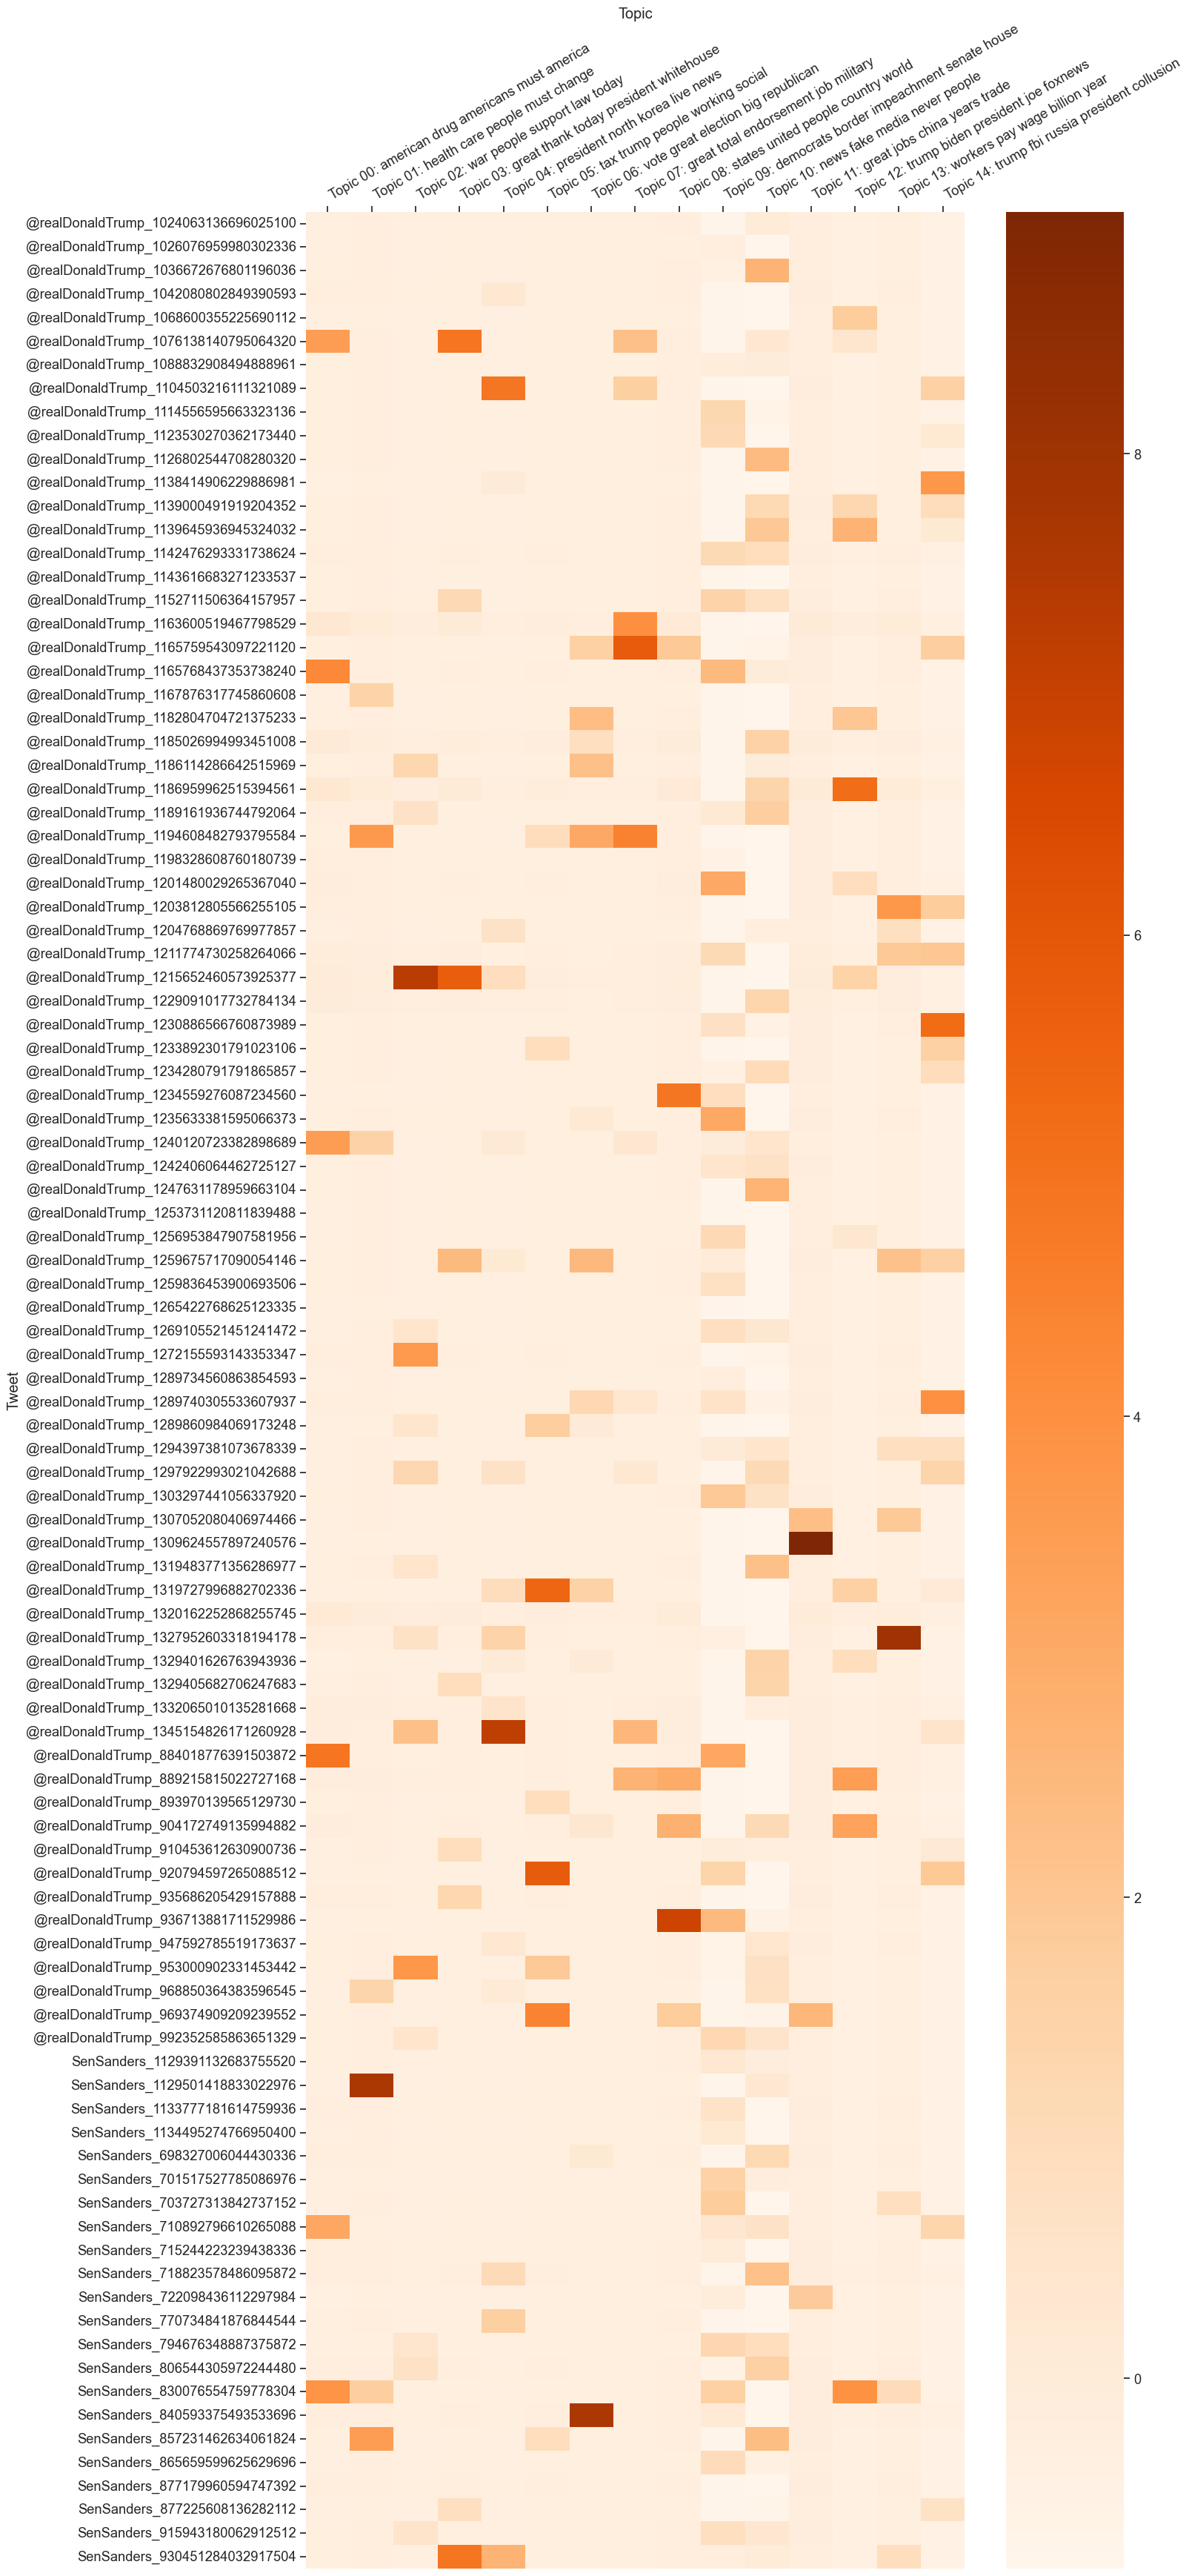

In [56]:
plot_categories_by_topics_heatmap(target_labels,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=target_labels,
                                  color_map = 'Oranges',
                                 dim=(16,35))

### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

# Q9 (words)

<font color=blue>It is difficult to make valid trend judgements from heat maps. Firstly Sanders has a much smaller sample size than Trump. For Sanders, almost only Topic1 is clearly related to Sanders and not to Trump.Topic0-Topic6 are somewhat related to Sanders, but the main distribution is still concentrated on Trump's tweets. And the latter Topics Trump is much darker in colour.
    
<font color=blue>An undifferentiated random sample across all tweets caused this result - obviously Trump tweets much more than Sanders, so the sample has a higher probability of landing on Trump's tweets.

### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

In [26]:
# X2 (code)

# Filter tweets by Trump and Sanders
trump_tweets = combined_df[combined_df['Username'] == '@realDonaldTrump'].sample(50, random_state=42)
sanders_tweets = combined_df[combined_df['Username'] == 'SenSanders'].sample(50, random_state=42)

# Concatenate the balanced samples
balanced_sample = pd.concat([trump_tweets, sanders_tweets])

# Shuffle the balanced sample
balanced_sample = balanced_sample.sample(frac=1, random_state=42).reset_index(drop=True)

balanced_sample

,Username,TweetId,Title,Content
0,SenSanders,1093573599980634112,SenSanders_1093573599980634112,"Mr. Trump, you are dead wrong. This is not a ""..."
1,SenSanders,949398409676558336,SenSanders_949398409676558336,This is a health crisis that no one is talking...
2,SenSanders,1067152462493159424,SenSanders_1067152462493159424,The fact that we have a President of the Unite...
3,@realDonaldTrump,1087200167802163200,@realDonaldTrump_1087200167802163200,Curt Schilling deserves to be in the Baseball...
4,@realDonaldTrump,1313832140287750145,@realDonaldTrump_1313832140287750145,"RT @dbongino: It’s Wednesday, October 7th 202..."
...,...,...,...,...
95,SenSanders,1143187172125761536,SenSanders_1143187172125761536,My colleagues @RepJayapal and @Ilhan are joini...
96,SenSanders,893499521627561984,SenSanders_893499521627561984,Vermont's Green Mountain Power continues to le...
97,@realDonaldTrump,963031666150313984,@realDonaldTrump_963031666150313984,This will be a big week for Infrastructure. A...
98,SenSanders,1004750647445647360,SenSanders_1004750647445647360,I believe that we have become far too comforta...


<font color=blue>Heat map using balanced samples. Obviously it is easier to observe trends in this newly generated heat map compared to the heat map generated by Q8. The balance of the sample is very important.

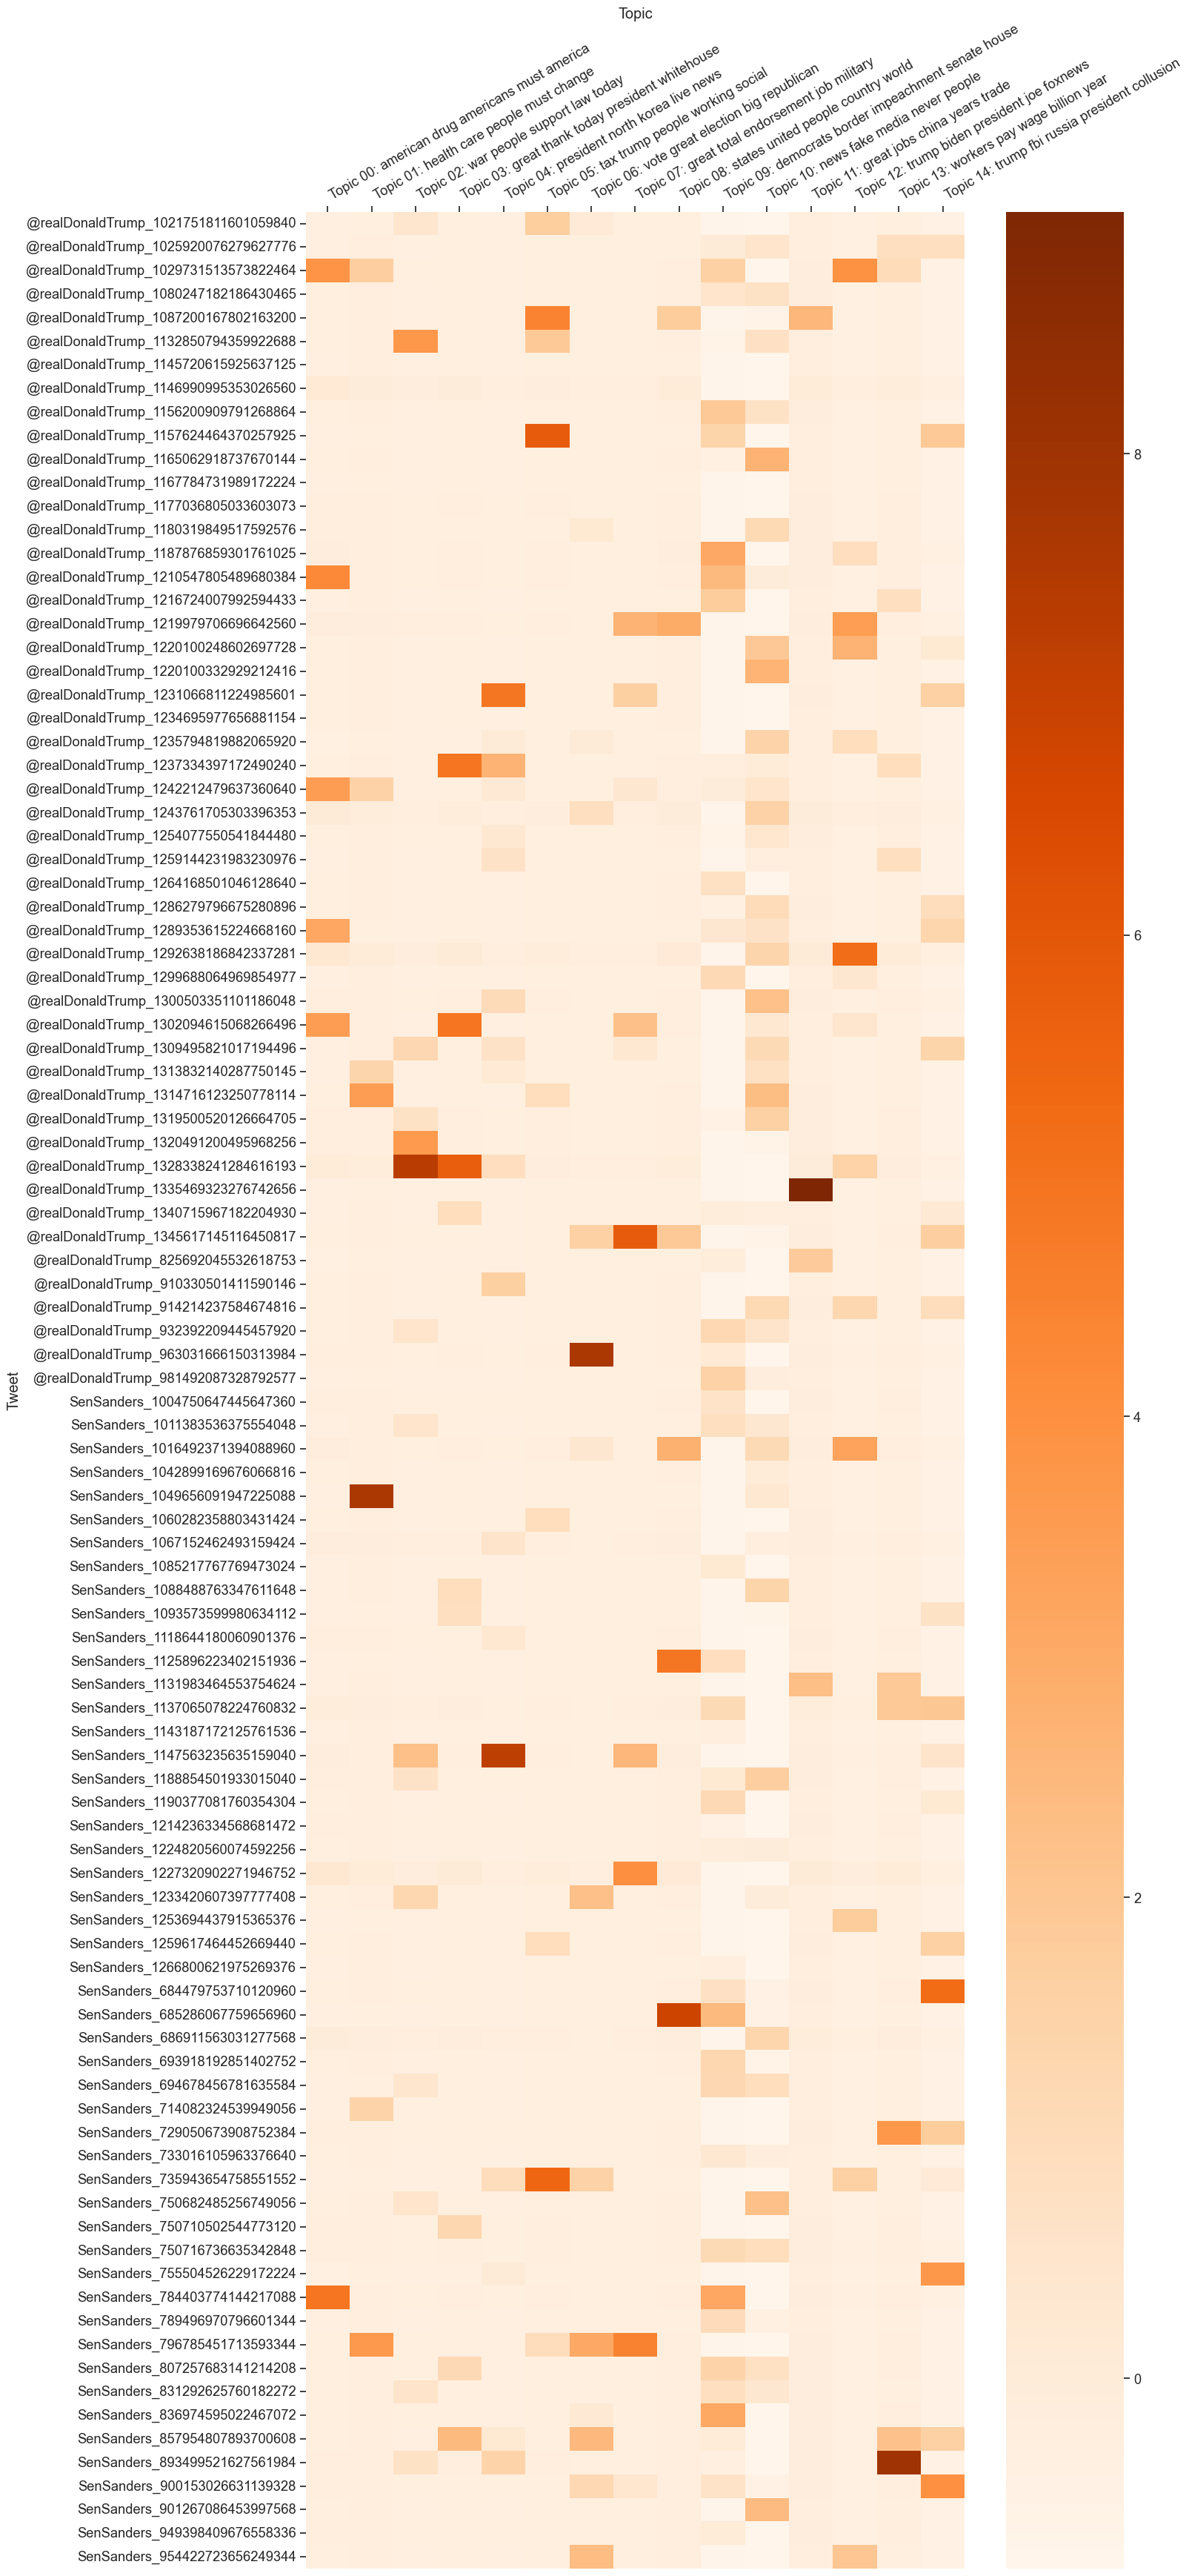

In [39]:
# Assuming balanced_sample DataFrame contains necessary columns
# Replace 'topic_distributions' and 'topic_individual_words' with actual data
# Ensure 'Username' and 'TweetId' columns contain username and tweet labels respectively, and 'Topic_Probabilities' column contains topic probabilities

# Call the function to plot the heatmap
plot_categories_by_topics_heatmap(labels=balanced_sample['Title'], 
                                  topic_distributions=topic_distributions, 
                                  topic_keys=topic_individual_words, 
                                  target_labels=None, 
                                  output_path=None, 
                                  color_map='Oranges',
                                  dim=(16, 35)) 


### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.

In [ ]:
# X3 (code and words)
# Tip: plotting a heatmap for thousands of tweets is not practical.
# Make a comparison based on the numerical values in the `df_norm_col` dataframe (see Week 6 notebook)